In [2]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [3]:
# 1. Loading and Preprocessing (2 marks) Load the breast cancer dataset from sklearn. Preprocess the data to handle any missing values and
# perform necessary feature scaling.
# Explain the preprocessing steps you performed and justify why they are necessary for this dataset.

data=load_breast_cancer()
X=pd.DataFrame(data.data,columns=data.feature_names)
y=pd.Series(data.target,name='target')

In [4]:
# missing values
X.isnull().sum()


,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [5]:
#feature scaling
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

#split into train-test
X_train, X_test, y_train, y_test=train_test_split(X_scaled,y,test_size=.2, random_state=42)



# **Preprocessing Explanation:**
Missing Values: The breast cancer dataset from sklearn has no missing values, but checking is a good habit.

Feature Scaling (StandardScaler): Algorithms like SVM and k-NN are distance-based and sensitive to feature scales. Therefore, standardization ensures that each feature contributes equally.


In [6]:
# 2. Classification Algorithm Implementation (5 marks) Implement the following five classification algorithms:

# 1. Logistic Regression 2. Decision Tree Classifier 3. Random Forest Classifier 4. Support Vector Machine (SVM) 5. k-Nearest Neighbors (k-NN)

#For each algorithm, provide a brief description of how it works and why it might be suitable for this dataset.


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [7]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(),
    "k-NN": KNeighborsClassifier()
}

# Train and test models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")



Logistic Regression Accuracy: 0.9737
Decision Tree Accuracy: 0.9474
Random Forest Accuracy: 0.9649
SVM Accuracy: 0.9737
k-NN Accuracy: 0.9474


# **Algorithm Explanations:**
Logistic Regression:
A linear model for classification. It estimates probabilities using a sigmoid function.

Suitable because the dataset is well-labeled and logistic regression performs well with linearly separable data.

Decision Tree Classifier:
A tree structure where internal nodes represent features, branches represent decision rules, and leaves represent outcomes.

Good for datasets with non-linear relationships and provides interpretability.

Random Forest Classifier:
An ensemble of decision trees; it reduces overfitting by averaging multiple trees.

Performs better on noisy data and usually provides higher accuracy.

Support Vector Machine (SVM):
Finds the hyperplane that best separates the classes.

Effective in high-dimensional spaces and when the number of features is larger than the number of samples.

k-Nearest Neighbors (k-NN):
A lazy learner that classifies based on the majority class among its k nearest neighbors.

# Simple and effective on small datasets but sensitive to the feature scale and large datasets.

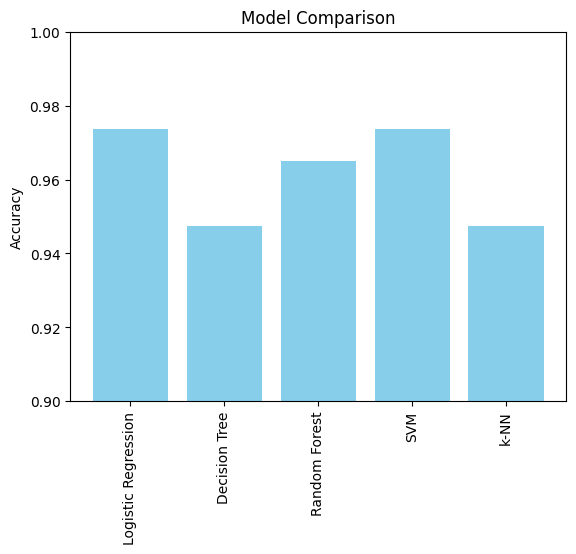


 Best Performing Models: Logistic Regression, SVM with Accuracy: 0.9737
 Worst Performing Models: Decision Tree, k-NN with Accuracy: 0.9474


In [8]:
# 3. Model Comparison: Compare the performance of the five classification algorithms.
# Which algorithm performed the best and which one performed the worst?

import matplotlib.pyplot as plt

# Plot
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1)
plt.title('Model Comparison')
plt.xticks(rotation=90)
plt.show()

# Best and worst

# Find max and min accuracy
max_acc = max(results.values())
min_acc = min(results.values())

# List all best models
best_models = [model for model, acc in results.items() if acc == max_acc]

# List all worst models
worst_models = [model for model, acc in results.items() if acc == min_acc]

# Print results
print(f"\n Best Performing Models: {', '.join(best_models)} with Accuracy: {max_acc:.4f}")
print(f" Worst Performing Models: {', '.join(worst_models)} with Accuracy: {min_acc:.4f}")



# **Conclusion:**
In this classification task using the Breast Cancer dataset, five different supervised learning algorithms were implemented and evaluated: Logistic Regression, Decision Tree, Random Forest, Support Vector Machine (SVM), and k-Nearest Neighbors (k-NN). After training and testing, both Logistic Regression and SVM emerged as the best-performing models, each achieving an accuracy of 0.9737. This indicates that linear models and margin-based classifiers are well-suited for this dataset, which is relatively clean and likely linearly separable.

On the other hand, the Decision Tree and KNN model showed the lowest performance with an accuracy of 0.9474. This suggests that while tree-based models are flexible, they may overfit or underperform without fine-tuning on this particular dataset.